# 데이터프레임 합치기
- 두개 이상의 DataFrame을 합쳐 하나의 DataFrame으로 만든다.

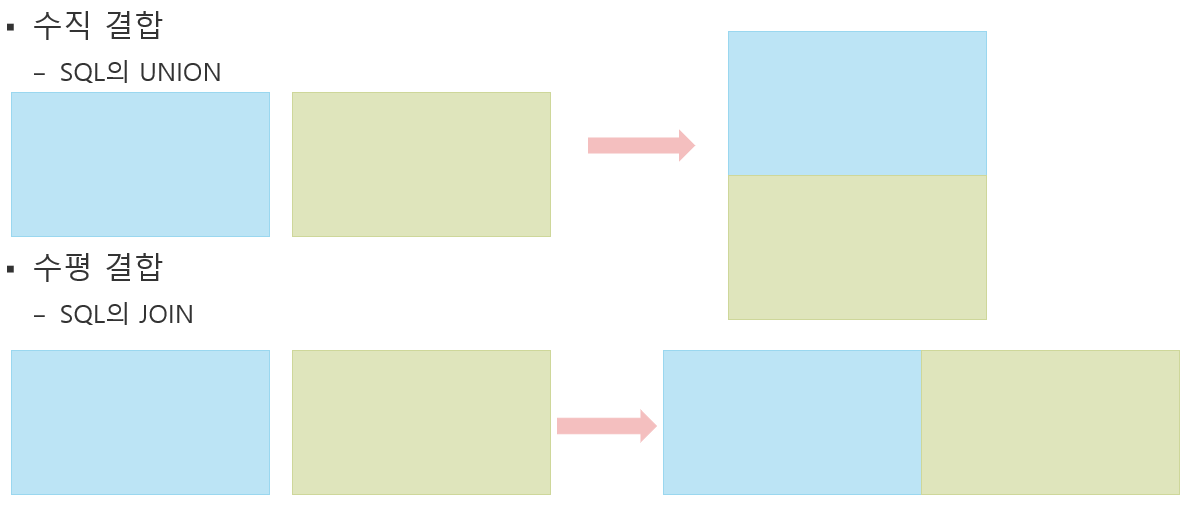

- **수직결합**
    - 단순결합으로 여러개의 DataFrame들의 같은 컬럼끼리 수직으로 합친다.
- **수평결합**
    - 연관성 있는 여러 데이터를 하나로 합쳐서 조회하는 JOIN 처리를 한다.
    - 합치려는 DataFrame의 index 나 특정 컬럼의 값이 같은 행 끼리 합친다. **!중요!**
- **inner join**
    - 행이 같아야 join 가능.
- **outer join**
    - 행이 같지 않아도 join 가능.(단, 행의 값이 맞지 않으면 Nan output)

## 데이터셋 읽기
- stocks_2016.csv, stocks_2017.csv, stocks_2018.csv : 년도별 보유 주식
- stocks_info.csv : 주식 정보

In [1]:
import os
import pandas as pd
import numpy as np

In [3]:
df1 = pd.read_csv('data/stocks_2016.csv')
df2 = pd.read_csv('data/stocks_2017.csv')
df3 = pd.read_csv('data/stocks_2018.csv')
df4 = pd.read_csv('data/stocks_info.csv')

In [6]:
file_names = ['2016','2017','2018','info']
stock_2016, stock_2017, stock_2018, stock_info = [pd.read_csv(f'data/stocks_{txt}.csv') for txt in file_names]


In [7]:
stock_2016.shape, stock_2017.shape, stock_2018.shape, stock_info.shape

((3, 4), (6, 4), (3, 4), (8, 2))

In [8]:
stock_2016

,Symbol,Shares,Low,High
0,AAPL,80,95,110
1,TSLA,50,80,130
2,WMT,40,55,70


In [9]:
stock_info

,Symbol,Name
0,AAPL,Apple Inc
1,TSLA,Tesla Inc
2,WMT,Walmart Inc
3,GE,General Electric
4,IBM,IBM(International Business Machines Co)
5,SLB,Schlumberger Limited.
6,TXN,Texas Instruments Incorporated
7,AMZN,"Amazon.com, Inc"


## concat() 이용
- 수직, 수평 결합 모두 지원한다.
- 하나의 데이터셋을 여러 DataFrame으로 나눈 것을 하나의 DataFrame으로 합칠 때 사용한다.

- 수직 결합 (행이 늘어나도록 합친다.)
    - **컬럼명이 같은 열끼리 합친다.**
    - 같은 column 명이 없는 열들도 결과 DataFrame에 들어간다.(default)
        - full outer join개념

- 수평결합(열이 늘어나도록 합친다.)
    - **index명이 같은 행 끼리 합친다.** (equi-join)
    - 같은 index명이 없는 행들도 결과 DataFrame에 들어간다.(default)
        - full outer join

In [15]:
import pandas as pd
# pd.concat([stock_2016, stock_2017, stock_2018])
# pd.concat([stock_2016, stock_2017, stock_2018, stock_info], 
#           join = 'inner' # 양쪽에 모두 있는 것들만 붙인다. = > inner
#          )
pd.concat([stock_2016, stock_2017, stock_2018],
         axis = 1,# 수평결합 - 1번 축 방향으로 합친다. => 행 index이름이 같은 것 끼리 합니다.
         join = 'inner'
         )

,Symbol,Shares,Low,High,Symbol,Shares,Low,High,Symbol,Shares,Low,High
0,AAPL,80,95,110,AAPL,50,120,140,AAPL,40,135,170
1,TSLA,50,80,130,GE,100,30,40,AMZN,8,900,1125
2,WMT,40,55,70,IBM,87,75,95,TSLA,50,220,400


In [17]:
result = pd.concat([stock_2016, stock_2017, stock_2018])
result

,Symbol,Shares,Low,High
0,AAPL,80,95,110
1,TSLA,50,80,130
2,WMT,40,55,70
0,AAPL,50,120,140
1,GE,100,30,40
2,IBM,87,75,95
3,SLB,20,55,85
4,TXN,500,15,23
5,TSLA,100,100,300
0,AAPL,40,135,170


In [18]:
result.iloc[6] # 열 조회

Symbol    SLB
Shares     20
Low        55
High       85
Name: 3, dtype: object

In [19]:
result.iloc[2] # 열 조회

Symbol    WMT
Shares     40
Low        55
High       70
Name: 2, dtype: object

In [20]:
result2 = pd.concat([stock_2016, stock_2017, stock_2018],
                   ignore_index=True)
# 'ignore_index=True'는 대상 dataframe들의 index이름은 무시하고(버리고) 붙인다.==> index명은 0 ~ 1씩 자동증가하는 값으면 변경.
result2

,Symbol,Shares,Low,High
0,AAPL,80,95,110
1,TSLA,50,80,130
2,WMT,40,55,70
3,AAPL,50,120,140
4,GE,100,30,40
5,IBM,87,75,95
6,SLB,20,55,85
7,TXN,500,15,23
8,TSLA,100,100,300
9,AAPL,40,135,170


In [22]:
result3 = pd.concat([stock_2016, stock_2017, stock_2018],
                   keys = ['2016년', '2017년', '2018년']) #각각의 DataFrame을 구분할 수 있는 index를 추가한다.(멀티 index)
result3

Symbol  Shares  Low  High
2016년 0   AAPL      80   95   110
      1   TSLA      50   80   130
      2    WMT      40   55    70
2017년 0   AAPL      50  120   140
      1     GE     100   30    40
      2    IBM      87   75    95
      3    SLB      20   55    85
      4    TXN     500   15    23
      5   TSLA     100  100   300
2018년 0   AAPL      40  135   170
      1   AMZN       8  900  1125
      2   TSLA      50  220   400

In [26]:
result3.loc['2016년'] # 2016년 DataFrame 추출 가능.
result3.loc[('2018년',0)] # 2018년의 0번 인덱스 추출.

Symbol    AAPL
Shares      40
Low        135
High       170
Name: (2018년, 0), dtype: object

- pd.concat(objs,  [, key=리스트]), axis=0, join='outer' )
    - 매개변수
        - objs: 합칠 DataFrame들을 리스트로 전달
        - keys=[] 를 이용해 합친 행들을 구분하기 위한 다중 인덱스 처리
        - axis
            - 0 또는 index : 수직결합
            - 1 또는 columns : 수평결합
        - join: 
            - 합치는 방식으로 다음 문자열을 값으로 설정한다.
                - 'outer'(기본값): full outer join
                - 'inner': inner join (동일한 index명, column명 끼리 합친다.)

> ### 조인(join)
> - 여러 데이터프레임에 흩어져 있는 정보 중 필요한 정보만 모아서 결합하기 위한 것.
> - 두개 이상의 데이터프레임을 특정 컬럼(열)의 값이 같은 행 끼리 수평 결합하는 것.
> - Inner Join, Left Outer Join, Right Outer Join, Full Outer Join

## 조인을 통한 DataFrame 합치기
- 연관성있는 둘 이상의 DataFrame을 하나로 합친다.
    - ex) 고객과 주문정보, 교수와 수업정보, 직원과 부서정보
- join()
    - **2개 이상**의 DataFrame을 조인할 때 사용
- merge()
    - **2개의** DataFrame의 조인만 지원

### join()
- dataframe객체.join(others, how='left', lsuffix='', rsuffix='') 
- `df_A.join(df_b)`, `df_A.join([df_b, df_c, df_d])`
- 두개 이상의 DataFrame들을 조인 할 수 있다.
    - **조인 기준**: index가 같은 값인 행끼리 합친다. (equi-join)
    - **조인 기본 방식: Left Outer Join - 'left'dataframe' 이 기준**
        
- 매개변수
    - lsuffix, rsuffix
        - 조인 대상 DataFrame에 같은 이름의 컬럼이 있으면 에러 발생.
        - 같은 이름이 있는 경우 붙일 접미어 지정
    - how :조인방식. 'left', 'right', 'outer', 'inner'. left가 기본
        

In [31]:
stock_info.join(stock_2017, lsuffix = '_info', rsuffix = '_2016')
# 행 index 이름이 같은 행끼리 join => 이 데이터프레임들은 Symbol 컬럼값이 같은 행끼리 join 해야된다.

,Symbol_info,Name,Symbol_2016,Shares,Low,High
0,AAPL,Apple Inc,AAPL,50.0,120.0,140.0
1,TSLA,Tesla Inc,GE,100.0,30.0,40.0
2,WMT,Walmart Inc,IBM,87.0,75.0,95.0
3,GE,General Electric,SLB,20.0,55.0,85.0
4,IBM,IBM(International Business Machines Co),TXN,500.0,15.0,23.0
5,SLB,Schlumberger Limited.,TSLA,100.0,100.0,300.0
6,TXN,Texas Instruments Incorporated,NaN,NaN,NaN,NaN
7,AMZN,"Amazon.com, Inc",NaN,NaN,NaN,NaN


In [37]:
join_df = stock_info.set_index('Symbol').join(stock_2017.set_index('Symbol'),
                                   how = 'inner') #inner join
join_df

,Name,Shares,Low,High
Symbol,,,,
AAPL,Apple Inc,50,120,140
TSLA,Tesla Inc,100,100,300
GE,General Electric,100,30,40
IBM,IBM(International Business Machines Co),87,75,95
SLB,Schlumberger Limited.,20,55,85
TXN,Texas Instruments Incorporated,500,15,23


In [39]:
stock_2017.set_index('Symbol').join(stock_info.set_index('Symbol'),
                                   how = 'right') # right outer join (stock_info의 모든 행이 다 join 된다.)

,Shares,Low,High,Name
Symbol,,,,
AAPL,50.0,120.0,140.0,Apple Inc
TSLA,100.0,100.0,300.0,Tesla Inc
WMT,NaN,NaN,NaN,Walmart Inc
GE,100.0,30.0,40.0,General Electric
IBM,87.0,75.0,95.0,IBM(International Business Machines Co)
SLB,20.0,55.0,85.0,Schlumberger Limited.
TXN,500.0,15.0,23.0,Texas Instruments Incorporated
AMZN,NaN,NaN,NaN,"Amazon.com, Inc"


In [41]:
# stock_info + stock_2016, 2017, 2018
# stock_info.join([stock_2016,stock_2017,stock_2018], lsuffix = '_ingo', rsuffix='_2000')
stock_2016.add_suffix("_접미어") # 뒤에 붙는 명령어
stock_2016.add_prefix('접두어_') # 앞에 붙는 명령어

,접두어_Symbol,접두어_Shares,접두어_Low,접두어_High
0,AAPL,80,95,110
1,TSLA,50,80,130
2,WMT,40,55,70


In [42]:
stock_2016_2 = stock_2016.set_index('Symbol').add_suffix('_2016')
stock_2017_2 = stock_2017.set_index('Symbol').add_suffix('_2017')
stock_2018_2 = stock_2018.set_index('Symbol').add_suffix('_2018')
stock_info_2 = stock_info.set_index('Symbol').add_suffix('_info')

In [45]:
stock_info_2.join([stock_2016_2,stock_2017_2,stock_2018_2],
                  how = 'inner'
                 )

,Name_info,Shares_2016,Low_2016,High_2016,Shares_2017,Low_2017,High_2017,Shares_2018,Low_2018,High_2018
Symbol,,,,,,,,,,
AAPL,Apple Inc,80,95,110,50,120,140,40,135,170
TSLA,Tesla Inc,50,80,130,100,100,300,50,220,400


### merge()
- **inner 방식이 이 기본방식이다.**
- `df_a.merge(df_b)`
- 두개의 DataFrame간의 조인만 가능하다.
    - **조인 기준**
        - **같은 컬럼명**을 기준으로 equi-join을 하는 것이 기본이다.
        - **조인기준을 다양하게 정할 수 있다.**
            - 컬럼, index등을 기준으로 같은 행끼리 join 하도록 설정할 수 있다.
    - **조인 기본 방식**
        - inner join
        - how 매개변수를 이용해 변경이 가능하다.
- `dataframe.merge(합칠dataframe, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False)`  
- 매개변수
    - on : 같은 컬럼명이 여러개일때 join 대상 컬럼을 선택
    - right_on, left_on : 조인할 때 사용할 왼쪽,오른쪽 Dataframe의 컬럼명. 
    - left_index, right_index: 조인 할때 index를 사용할 경우 True로 지정 
    - how : 조인 방식.  'left', 'right', 'outer', 'inner'. 기본: inner 
    - suffixes: 두 DataFrame에 같은 이름의 컬럼명이 있을 경우 구분을 위해 붙인 접미어를 리스트로 설정
        - 생략시 x, y를 붙인다.       

In [61]:
stock_2016.merge(stock_info, how = 'right') # 같은 컬럼명(Symbol)의 값을 기준으로 join
stock_info.merge(stock_2016, how = 'left') # join 방식: inner join


,Symbol,Name,Shares,Low,High
0,AAPL,Apple Inc,80.0,95.0,110.0
1,TSLA,Tesla Inc,50.0,80.0,130.0
2,WMT,Walmart Inc,40.0,55.0,70.0
3,GE,General Electric,NaN,NaN,NaN
4,IBM,IBM(International Business Machines Co),NaN,NaN,NaN
5,SLB,Schlumberger Limited.,NaN,NaN,NaN
6,TXN,Texas Instruments Incorporated,NaN,NaN,NaN
7,AMZN,"Amazon.com, Inc",NaN,NaN,NaN


In [64]:
stock_info.merge(stock_2016_2,
                 left_on = 'Symbol', # 왼쪽 (stock_info) 에서는 Symbol 컬럼을 join 기준.
                 right_index = True) # 오른쪽(stock_2016_2) 에서는 index 이름을 join 기준.

,Symbol,Name,Shares_2016,Low_2016,High_2016
0,AAPL,Apple Inc,80,95,110
1,TSLA,Tesla Inc,50,80,130
2,WMT,Walmart Inc,40,55,70


In [65]:
stock_2016_2.merge(stock_info,
                  left_index = True, right_on = "Symbol")

,Shares_2016,Low_2016,High_2016,Symbol,Name
0,80,95,110,AAPL,Apple Inc
1,50,80,130,TSLA,Tesla Inc
2,40,55,70,WMT,Walmart Inc


In [66]:
stock_2016.merge(stock_2018, on = 'Symbol', # 같은 이름의 컬럼이 여러개 일때 Join 기준 컬럼을 일부만 선택할떄 on을 사용.
                 suffixes=['_2016','_2018']
                )

,Symbol,Shares_2016,Low_2016,High_2016,Shares_2018,Low_2018,High_2018
0,AAPL,80,95,110,40,135,170
1,TSLA,50,80,130,50,220,400


- 하나의 데이터셋을 어떤 특정행 또튼 특정열을 기준으로 단순해 분리 한 경우를 합치는 경우 concat() 사용
    - 수직 결합일 경우는 concat()을 사용해야 한다. 
- 서로 연관성 있는 다른 데이터셋을 결합해서 보는 경우 join(), merge()를 사용한다. (Join)
    - **두 개 이상의** DataFrame을 조인할 때는 하는 경우 : join() 사용
    - 두개의 DataFrame을 조인할 때는 **merge()** 를 사용한다. => 컨트롤이 편하다.

<b style='font-size:2em'>TODO</b>

In [1]:
import os
import pandas as pd
import numpy as np

In [4]:
# 1 data/customer.csv, data/order.csv, data/qna.csv 를 DataFrame으로 읽으시오.
customer = pd.read_csv('data/customer.csv') 
order = pd.read_csv('data/order.csv')
qna = pd.read_csv('data/qna.csv')

In [12]:
# or
customoer, order, qna = [pd.read_csv(f'data/{file_name}.csv') for file_name in file_namesa]

NameError: name 'file_names' is not defined

In [ ]:
# 2 TODO1에서 읽은 세개의 데이터셋의 정보를 확인하세요. 

In [69]:
customer

,id,name,age
0,id-1,김영수,33
1,id-2,박선영,23
2,id-3,오정현,21
3,id-4,박명수,40
4,id-5,이철기,17


In [70]:
orderr

,order_id,cust_id,total_price
0,1,id-1,100000
1,2,id-1,250000
2,3,id-2,300000
3,4,id-2,15000
4,5,id-2,51000
5,6,id-4,32000


In [71]:
qna

,qna_no,cust_id,txt
0,1,id-4,물건있나요?
1,2,id-4,얼마에요
2,3,id-5,반품은 어떻게 해요?


In [14]:
print(customer.columns)
print(order.columns)
print(qna.columns)

Index(['id', 'name', 'age'], dtype='object')
Index(['order_id', 'cust_id', 'total_price'], dtype='object')
Index(['qna_no', 'cust_id', 'txt'], dtype='object')


In [19]:
# 3 customer DataFrame과 order DataFrame을 고객정보는 모두 나오도록 join 하세요.
# pd.concat([customer,orderr], ignore_index = True)
cust_order_join = customer.merge(order, left_on="id",right_on='cust_id',how ='left')
cust_order_join

,id,name,age,order_id,cust_id,total_price
0,id-1,김영수,33,1.0,id-1,100000.0
1,id-1,김영수,33,2.0,id-1,250000.0
2,id-2,박선영,23,3.0,id-2,300000.0
3,id-2,박선영,23,4.0,id-2,15000.0
4,id-2,박선영,23,5.0,id-2,51000.0
5,id-3,오정현,21,NaN,NaN,NaN
6,id-4,박명수,40,6.0,id-4,32000.0
7,id-5,이철기,17,NaN,NaN,NaN


In [23]:
cust_order_join.query('name == "김영수"')
cust_order_join.groupby('id')['total_price'].mean()

id
id-1    175000.0
id-2    122000.0
id-3         NaN
id-4     32000.0
id-5         NaN
Name: total_price, dtype: float64

In [29]:
# 4 customer DataFrame의 index를 id컬럼으로 변경.
customer2 = customer.set_index('id')

In [32]:
# 5 customer DataFrame과 qna DataFrame을 inner join 하세요.
customer.join(qna, how = 'right')

customer2.merge(qna, left_index=True, right_on='cust_id', how = 'inner')

,name,age,qna_no,cust_id,txt
0,박명수,40,1,id-4,물건있나요?
1,박명수,40,2,id-4,얼마에요
2,이철기,17,3,id-5,반품은 어떻게 해요?


In [34]:
customer2.join(qna.set_index('cust_id'), how = 'inner')

,name,age,qna_no,txt
id-4,박명수,40,1,물건있나요?
id-4,박명수,40,2,얼마에요
id-5,이철기,17,3,반품은 어떻게 해요?


In [84]:
# 6. 세개의 DataFrame을 고객정보는 모두 나오도록 join 하세요.
pd.concat(customer,orderr,qna, join = "inner")

/var/folders/nc/lry6d8ws417_mblykm_8wpc40000gn/T/ipykernel_55434/3294471755.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  pd.concat(customer,orderr,qna, join = "inner")


TypeError: concat() got multiple values for argument 'join'

In [37]:
customer2.join([order.set_index('cust_id'), qna.set_inder('cust_id')]),how = 'left'
result

SyntaxError: cannot assign to function call (789878179.py, line 1)

In [39]:
# My Solution (1)

year = int(input())

if year % 4 == 0 and ((year % 100) or (year % 400 == 0)):
    print(1)
else:
    print(0)

1999
0
